# Welcome to Pipelines!

The HuggingFace transformers library provides APIs at two different levels.

The High Level API for using open-source models for typical inference tasks is called "pipelines". It's incredibly easy to use.

You create a pipeline using something like:

`my_pipeline = pipeline("the_task_I_want_to_do")`

Followed by

`result = my_pipeline(my_input)`

And that's it!

See end of this colab for a list of all pipelines.

## Before we start: 2 important pro-tips for using Colab:

**Pro-tip 1:**

Data Science code often gives warnings and messages. They can mostly be safely ignored! Glance over them, and if something goes wrong later, perhaps they can give you a clue.

**Pro-tip 2:**

In the middle of running a Colab, you might get an error like this:

> Runtime error: CUDA is required but not available for bitsandbytes. Please consider installing [...]

This is a super-misleading error message! Please don't try changing versions of packages...

This actually happens because Google has switched out your Colab runtime, perhaps because Google Colab was too busy. The solution is:

1. Kernel menu >> Disconnect and delete runtime
2. Reload the colab from fresh and Edit menu >> Clear All Outputs
3. Connect to a new T4 using the button at the top right
4. Select "View resources" from the menu on the top right to confirm you have a GPU
5. Rerun the cells in the colab, from the top down, starting with the pip installs

And all should work great - otherwise, ask me!


## A sidenote:

You may already know this, but just in case you're not familiar with the word "inference" that I use here:

When working with Data Science models, you could be carrying out 2 very different activities: **training** and **inference**.

### 1. Training  

**Training** is when you provide a model with data for it to adapt to get better at a task in the future. It does this by updating its internal settings - the parameters or weights of the model. If you're Training a model that's already had some training, the activity is called "fine-tuning".

### 2. Inference

**Inference** is when you are working with a model that has _already been trained_. You are using that model to produce new outputs on new inputs, taking advantage of everything it learned while it was being trained. Inference is also sometimes referred to as "Execution" or "Running a model".

All of our use of APIs for GPT, Claude and Gemini in the last weeks are examples of **inference**. The "P" in GPT stands for "Pre-trained", meaning that it has already been trained with data (lots of it!) In week 6 we will try fine-tuning GPT ourselves.
  
The pipelines API in HuggingFace is only for use for **inference** - running a model that has already been trained. In week 7 we will be training our own model, and we will need to use the more advanced HuggingFace APIs that we look at in the up-coming lecture.

I recorded this playlist on YouTube with more on parameters, training and inference:  
https://www.youtube.com/playlist?list=PLWHe-9GP9SMMdl6SLaovUQF2abiLGbMjs


In [2]:
# Pip installs should come at the top line.
# If your Kernel ever resets, you need to run this again.

!pip install -q --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.8 MB/s eta 0:00:00


In [3]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Fri Nov  7 21:00:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Imports

import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

# Important Note - Hugging Face account

In Day 1, we set up a FREE account on https://huggingface.co

### If you skipped this:

Please go back and do it! Then go to the Avatar menu, Tokens, and create an API token.. And make sure it has WRITE permissions! And then add it to the secrets on the left by pressing the key button.

### If you did this (thank you!)

Click on the Key button and turn on the switch so that this notebook gets access to your Hugging Face key.

In [5]:
hf_token = userdata.get('HF_TOKEN')
if hf_token and hf_token.startswith("hf_"):
  print("HF key looks good so far")
else:
  print("HF key is not set - please click the key in the left sidebar")
login(hf_token, add_to_git_credential=True)

HF key looks good so far


## Using Pipelines from Hugging Face

A simple way to run inference for common tasks, without worrying about all the plumbing, picking reasonable defaults.


### How it works:

STEP 1: Create a pipeline - a function you can then call

```python
my_pipeline = pipeline(task, model=xx, device=xx)
```

If you don't specify a model, then Hugging Face picks one for you that's the default for the task. Specify "cuda" for the device to use an NVIDIA GPU like the one on the T4. Specify "mps" on a Mac.


STEP 2: Then call it as many times as you want:

```python
my_pipeline(input1)
my_pipeline(input2)
```

In [6]:
# Sentiment Analysis

my_simple_sentiment_analyzer = pipeline("sentiment-analysis", device="cuda")
result = my_simple_sentiment_analyzer("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [7]:
result = my_simple_sentiment_analyzer( "It would be impossible to sum up all the stuff that's wrong with this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume ")
print(result)

[{'label': 'NEGATIVE', 'score': 0.9954997897148132}]


In [8]:

#scoring sentitment instead
better_sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device="cuda")
result = better_sentiment("I should be more excited to be on the way to LLM mastery!!")
print(result)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda


[{'label': '3 stars', 'score': 0.39448031783103943}]


In [9]:
# Named Entity Recognition, taking token, catergoizing differnet things in : can take a chat adn extract cetain names

ner = pipeline("ner", device="cuda")
result = ner("M.S. Data Analytics and Visualization,Software Engineer, Graphic Designer & Co-Founder,  Yeshiva University - Katz School of Science and Health | New York, NY  SBIR/STTR federal grant applications| Expected May 2026. yython, R, SQL,Emmanuel Olimi Kasigazi")
for entity in result:
  print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


{'entity': 'I-ORG', 'score': np.float32(0.6867608), 'index': 9, 'word': 'and', 'start': 20, 'end': 23}
{'entity': 'I-ORG', 'score': np.float32(0.99793774), 'index': 23, 'word': 'Yes', 'start': 89, 'end': 92}
{'entity': 'I-ORG', 'score': np.float32(0.9838483), 'index': 24, 'word': '##hiva', 'start': 92, 'end': 96}
{'entity': 'I-ORG', 'score': np.float32(0.9949327), 'index': 25, 'word': 'University', 'start': 97, 'end': 107}
{'entity': 'I-LOC', 'score': np.float32(0.5611663), 'index': 27, 'word': 'Katz', 'start': 110, 'end': 114}
{'entity': 'I-LOC', 'score': np.float32(0.5786444), 'index': 28, 'word': 'School', 'start': 115, 'end': 121}
{'entity': 'I-LOC', 'score': np.float32(0.6161783), 'index': 29, 'word': 'of', 'start': 122, 'end': 124}
{'entity': 'I-LOC', 'score': np.float32(0.4796459), 'index': 30, 'word': 'Science', 'start': 125, 'end': 132}
{'entity': 'I-ORG', 'score': np.float32(0.5818252), 'index': 31, 'word': 'and', 'start': 133, 'end': 136}
{'entity': 'I-LOC', 'score': np.floa

In [10]:
# Question Answering with Context

question="What are thisnperson skilss?"
context= ''' ults-driven leader, data professional and strategic communicator with 13+ years of experience at the
intersection data analytics, operations, creativity and people management. Proven ability to lead cross-
functional teams, translate complex concepts for diverse audiences, and strategically start, scale ventures from
concept to execution. Experience spans software development, operations management, data analytics and
strategic planning in multiple countries and sectors.
EDUCATION
M.S. Data Analytics and Visualization, Yeshiva University - Katz School of Science and Health | New
York, NY | Expected May 2026
B.S. Information Systems, Makerere University | Kampala, Uganda | January 2014
SKILLS & CERTIFICATIONS
Analytics: Python, R, SQL, Tableau, Power BI | Tools: Linux, Anaconda env, Cursor, pgAdmin, R Studio,
VS code, Git, Ollama, Codex, Gemini CLI, Claude Code | Data & Cloud: AWS(solution architecture),
Snowflake, Azure, PostgreSQL, Pandas
Certifications & Continuous Learning
LLM Engineering, mastering Generative AI, RAG, LoRA and AI Agents (Ed Donner) • AI in
Production(2025) • Gen AI and Agentic AI at scale((Ed Donner)(2025) • MicroMasters Statistics & Data
Science (MITx) • Data Science for Business((DataCamp) • Prompt Engineering for Developers
(DeepLearning.AI) •Data Cloud Deployment Framework in Snowflake (2025) • Microsoft Power BI data
analytics ( 2025)
Languages: English (Fluent), Swahili (Beginner), Runyakitara (Fluent)
EXPERIENCE
Data Analyst intern | Sy Syms School of Business, Yeshiva University | New York, NY | July 2025- Present
· Integrated and cleaned three disparate alumni datasets containing 5,494 records to enable strategic
alumni engagement initiatives
· Resolved 652 exclusion records and identified 680 duplicate entries using systematic data validation
techniques in Python
· Enhanced alumni profiles with current employment information by merging career services data
across multiple academic years
· Delivered organized database of 4,876 verified records, segmented by degree type and sorted
chronologically by graduation year
· Created research framework and methodology for LinkedIn profile verification and contact
information updates
· Collaborated with marketing team to establish data management protocols for ongoing alumni
outreach efforts
Graduate Assistant, Communications | Katz School of Science and Health, Yeshiva University | New York,
NY | Jan 2025 - Present
· Conducted comprehensive data analysis of alumni networks, social media metrics, and institutional
datasets to develop targeted marketing campaigns, resulting in 30% increase in student platform
engagement and 25% increase in enrollment.
· Created, produced and Lauched the Voice of Katz podcast, showcasing student stories and campus
life.
· Revamped the school’s YouTube channel, including content strategy, visual design, and engagement
optimization.
· Designed digital and print assets to support school branding and communications.
· Collaborate with faculty and students to create compelling multimedia content from existing data.
Entrepreneurial Lead | National Science Foundation I-Corps NY Regional I-Corps Lean Bootcamp | New York
| Summer 2025National Science Foundation-funded entrepreneurship program validating technology commercialization.
· Developed go-to-market strategy for offline AI educational technology targeting NYC schools (grades
6-12), reducing teacher prep time by 3-5 hours weekly while eliminating digital distractions.
· Led customer discovery for Axam AI education platform, conducting 20+ key target stakeholder
interviews with The New York State Education Department education leaders, administrators, and
teachers in New York to validate market demand and pivot business model.
· Collaborated with cross-functional team of technical leads and industry mentors to assess commercial
viability and prepare SBIR/STTR federal grant applications
· Secured $3,000 federal funding for customer research activities through competitive NSF I-Corps
selection process
· Presented to expert panel of seasoned entrepreneurs and investors, demonstrating lean startup
methodology and customer validation techniques.
Founder in Residence | Antler Canada | Toronto, Canada | Mar 2024 - Jul 2024
· Selected for the highly competitive startup accelerator program (Cohort TOR5) with <10%
acceptance rate, advancing an AI-focused platform to upskill and provide career guidance to low-wage
workers to 1st investment stages.
· Developed comprehensive business strategies, investor pitches, and market research, refining venture
communication and networking capabilities.
Co-founder & Host | MIT OCW Chalk Radio Presents: Open Learners" Podcast | Massachusetts Institute of
Technology | Cambridge, MA | Nov 2022 - Dec 2024
· Co-developed, produced and hosted a six-episode podcast featuring global users of MIT OCW
resources, reaching an international audience of over 5 Million.
· Sourced guests using data-driven selection metrics, conducted interviews based on audience analytics,
and prepared scripts showcasing open learning initiatives while tracking engagement patterns.
Software Engineer, Graphic Designer & Co-Founder | Wazi Group Limited | Uganda, East Africa | Jun
2011 - Jul 2024.
· Co-founded and scaled a B2B technology firm serving multiple industries—initially focused on tech,
and later expanding into branding, print production, and procurement. Over a 14-year period, served
300+ clients including non-profits, government entities, individuals, and private sector organizations
across Uganda, South Sudan, Congo , Rwanda and Kenya: in the East African region.
· Led and expanded operations into branding, print production, and procurement & supply chain
management, resulting in over 80% revenue growth within the first two years of implementation.
· Led a nationwide, data-driven campaign strategy for Uganda’s only female presidential candidate in
the 2021 election, developing comprehensive branding strategies and managing cross-channel
performance metrics—resulting in a 200% increase in visibility and ratings, all during the country’s
second lockdown
· Implemented an automated online system that successfully migrated 3M+ company records for
Uganda Registration Services Bureau
· Developed web and mobile app solutions including payment platforms and ride-sharing applications
using JavaScript, Python, Java, and modern frameworks
I.T Trainer & Computer Administrator | Friedrich-Ebert-Stiftung | South Sudan | Feb 2014 - Oct 2015
· Trained 900+ learners across 20 organizations in software and hardware skills, with 95% satisfaction
rate.
· Developed and deployed Java-based POS systems adopted by 12+ supermarket chains operating 30+
locations
· Created comprehensive curriculum adapting technical content for diverse audience skill levels
Information Systems and Networks Admin Intern | Ministry of Defense and Veterans Affairs | Kampala,
Uganda | May 2012 - Feb 2013
· Collaborated on migrating 100,000+ soldier medical records from paper to secure on-site servers,
implementing data validation and encryption protocols.
· Monitored and maintained on-premise networks and data warehouses, gaining expertise in security
and compliance standards·
Developed strong attention to detail and quality assurance skills in a high-standard operational
environment
SELECT PROJECTS: (Full easy to read details here. Detailed project & code on Github)
· RAG(Retrieval-Augmented Generation) Pipeline Development: Built a custom RAG pipeline from
scratch, to process PDF files, handle user queries, and generate responses using an (LLM).
· Wine Sales Analytics & Data Pipeline: Advanced EDA, ETL & ML Pipeline –Transformed 99%
outlier wine dataset into production ML pipeline through advanced preprocessing and domain feature
engineering, delivering 55.9% predictive correlation.
· Alumni Database Integration & Optimization: Integrated and cleaned 5,494 alumni records from three
disparate datasets using Python and Pandas, delivering a unified database
· NYC Noise Landscape:Conducted a study on NYC 311 noise complaits dataset, Identified and
visualized noise complaint hotspots to infor'''

question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question=question, context=context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 1.5955072740325704e-05, 'start': 115, 'end': 175, 'answer': 'data analytics, operations, creativity and people management'}


In [11]:
# Text Summarization

summarizer = pipeline("summarization", device="cuda")
text = """
The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [25]:
# Translation

translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API..")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [38]:
# Another translation, showing a model being specified
# All translation models are here: https://huggingface.co/models?pipeline_tag=translation&sort=trending

translator = pipeline("translation_en_to_lg", model="michaeltendo/luganda", device="cuda", max_length=400)
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/303M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/303M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/825k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Bannasayansi abo beewuunya nnyo olw'amaanyi ge baalina n'obusobozi bw'okutegeera ebigendererwa by'Omukutu ogw'Ensi Yonna.


In [29]:
# Classification
#sentecne put in a bucke
classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


In [39]:
# Text Generation

generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that I always come up with a good way to do it.

A good way to do it is to use the syntax of a function and then use a function that has a default constructor. For example, I'll use a function like this:

template < typename T> struct Person { typedef T_T; typedef T_R; typedef T_E; typedef T_C; typedef T_T1; typedef T_W; int i; void (*)(T_R) { Person<T> a = x; }

Then I create a function:

int get_attributes(T_T); // Returns T_T pointer to the given T_T object int get_attributes(T_T1); // Returns T_T object from T_R int get_attributes(T_T2); // Returns T_T object from T_E int get_attributes(T_T3); // Returns T_T object from T_C int get_attributes(T_T4); // Returns T_T object from T_W

And then I add the following to the function:

int get_attributes(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/4 [00:00<?, ?it/s]

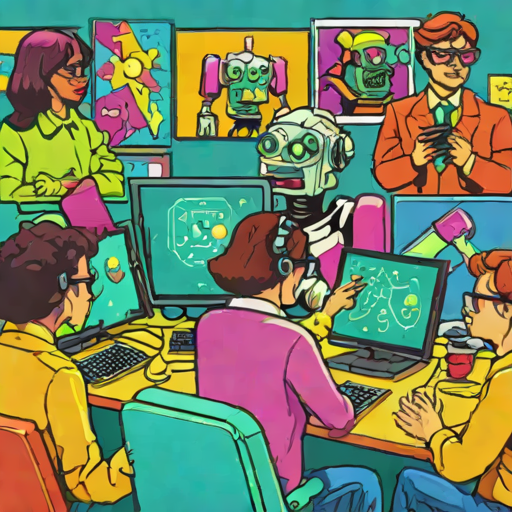

In [40]:
# Image Generation - remember this?! Now you know what's going on
# Pipelines can be used for diffusion models as well as transformers

from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "A class of students learning AI engineering in a vibrant pop-art style"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)

In [41]:
# Audio Generation

from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch
from IPython.display import Audio

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')
embeddings_dataset = load_dataset("matthijs/cmu-arctic-xvectors", split="validation", trust_remote_code=True)
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)
speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

Audio(speech["audio"], rate=speech["sampling_rate"])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

cmu-arctic-xvectors.py: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

spkrec-xvect.zip:   0%|          | 0.00/17.9M [00:00<?, ?B/s]

Generating validation split: 0 examples [00:00, ? examples/s]

# All the available pipelines

Here are all the pipelines available from Transformers and Diffusers.

With thanks to student Lucky P for suggesting I include this!

There's a list pipelines under the Tasks on this page (you have to scroll down a bit, then expand the parameters to see the Tasks):

https://huggingface.co/docs/transformers/main_classes/pipelines

There's also this list of Tasks for Diffusion models instead of Transformers, following the image generation example where I use DiffusionPipeline above.

https://huggingface.co/docs/diffusers/en/api/pipelines/overview

If you come up with some cool examples of other pipelines, please share them with me! It's wonderful how HuggingFace makes this advanced AI functionality available for inference with such a simple API.